**Q1. Problem Statement: Data Pre-Processing (Categorical data)**

You are given a dataset – “hotel_bookings.csv.” The dataset has a high number of null and  elements that need to be cleansed;  Your job is to create a separate DataFrame with only categorical columns and  perform the  following operations:


1.	Find the number of null values in each column of the new DataFrame

2.	Replace the null values with mode 

3.	In the "hotel" column, replace the hotel names with "0" and "1" based on the condition that – if, "hotel" = "city_hotel", then "hotel" = "1";  else, "0"

4.	Using the label encoder, assign a unique country code to each country

5.	Using onehot encoder, encode the “month” column


In [2]:
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
# DataFrame with only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
cat_df = df[categorical_columns]
cat_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [4]:
# Number of null values in each column of the new DataFrame
cat_df.isnull().sum()

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [5]:
# Replace the null values with mode
cat_df['country'].fillna(cat_df['country'].mode().iloc[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28512\1357775907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['country'].fillna(cat_df['country'].mode().iloc[0], inplace=True)


In [9]:
cat_df.isnull().sum()

hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64

In [11]:
cat_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [12]:
def ap(df):
  if df=='City Hotel':
    return 1
  else:
    return 0

In [14]:
cat_df['hotel']=cat_df['hotel'].apply(ap)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28512\2119005050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel']=cat_df['hotel'].apply(ap)


In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder=LabelEncoder()
cat_df['country']=label_encoder.fit_transform(cat_df['country'])
cat_df['country']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28512\2119307677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['country']=label_encoder.fit_transform(cat_df['country'])


0         135
1         135
2          59
3          59
4          59
         ... 
119385     15
119386     56
119387     43
119388     59
119389     43
Name: country, Length: 119390, dtype: int32

In [18]:
cat_df['arrival_date_month'].duplicated().sum()

119378

In [19]:
arr1=cat_df['arrival_date_month'].unique()

In [21]:
onehot_encoder=OneHotEncoder()
onehot_encoder.fit(cat_df[['arrival_date_month']])

OneHotEncoder()

In [23]:
one_coder=onehot_encoder.transform(cat_df[['arrival_date_month']])
one_coder.shape


(119390, 12)

In [24]:
one_encoded_df=pd.DataFrame(one_coder.toarray(),columns=arr1)
one_encoded_df

,July,August,September,October,November,December,January,February,March,April,May,June
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119388,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
cat_df.drop('arrival_date_month',axis=1,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28512\3995175266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df.drop('arrival_date_month',axis=1,inplace=True)


In [26]:
cat_df=pd.concat([cat_df,one_encoded_df],axis=1)
cat_df

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,...,September,October,November,December,January,February,March,April,May,June
0,0,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,BB,59,Direct,Direct,A,C,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,BB,59,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,BB,15,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119386,1,BB,56,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119387,1,BB,43,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119388,1,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Q2. Problem Statement: Data Pre-Processing (Exponential data)**

Create a DataFrame to store exponential data using the NumPy np.random.exponential() (size=1000) function, and perform the following operations:

1.	Using the minmax_scaling() function, scale the data between 0 to 1, and plot the original data and scaled data using the Seaborn library 

2.	Using preprocessing.normalize() function, normalize the data, and plot the original data and normalized data using the Seaborn library


In [27]:
import numpy as np
import seaborn as sns
import pandas as pd

In [28]:
arr=np.random.randint(255,6788,size=1000)
arr=[np.random.exponential(i) for i in arr]
df=pd.DataFrame(arr,columns=['exponential'])
df_exp=df.copy()

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mx=MinMaxScaler()

In [31]:
df_mx=mx.fit_transform(df)
df['scaled']=df_mx
df

,exponential,scaled
0,771.922141,0.019934
1,947.978713,0.024500
2,812.601305,0.020989
3,1838.682267,0.047600
4,316.197799,0.008116
...,...,...
995,726.263158,0.018750
996,494.635778,0.012743
997,2765.912129,0.071647
998,969.608278,0.025061


<AxesSubplot:xlabel='exponential', ylabel='scaled'>

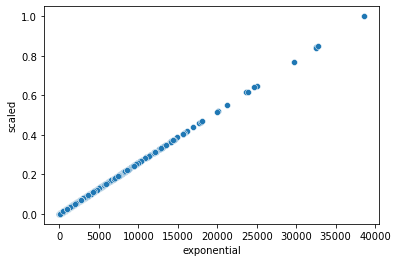

In [32]:
sns.scatterplot(data=df,x=df['exponential'],y=df['scaled'])

In [33]:
from sklearn.preprocessing import normalize

In [34]:
nm=normalize(df_exp)
nm=pd.DataFrame(nm,columns=['normalize'])
nm

,normalize
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
995,1.0
996,1.0
997,1.0
998,1.0


<AxesSubplot:xlabel='exponential', ylabel='normalize'>

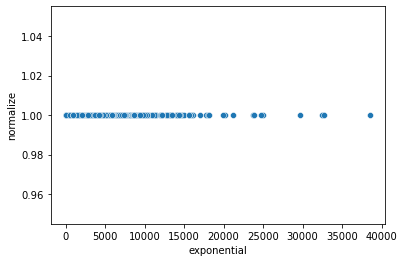

In [35]:
sns.scatterplot(x=df_exp['exponential'],y=nm['normalize'])